### 0. Loading dependencies

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scipy
import statsmodels.formula.api as smf
import random
from scipy.stats import iqr
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
# String styling
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

### 1.1 Data Preparation: Data Cleaning, Relabeling, Wrangling and splitting subset.

In [2]:
df_salary = pd.read_csv('salary.csv')
df_salary[df_salary.salary.isnull()]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


In [3]:
#Fill Nan values is salary column
df_salary = df_salary.fillna(df_salary.salary.mean())

#Rename as per metadata
df_salary =df_salary.rename(columns ={'male':'gender', 'experior':'Experience', 'yearsabs':'years_absent'})
df_salary.gender = ['male' if i == 1 else 'female' for i in df_salary.gender]
df_salary.position = ['Jnr_employee' if i == 1 else 'Manager' if  i == 2 else 'Executive' for i in df_salary.position]
df_salary.Field = ['Engineering' if i == 1 else 'Finance' if i == 2 else 'Human Resource' if i == 3 else 'Marketing' for i in df_salary.Field]    
df_salary = pd.DataFrame(df_salary)
df_salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,gender,Field,years_absent
0,53000.0,0,0,0,1.17,1,0,Jnr_employee,male,Human Resource,0
1,58000.0,1,0,0,1.24,1,0,Jnr_employee,male,Finance,0
2,45500.0,0,0,0,1.21,1,0,Jnr_employee,male,Human Resource,2
3,35782.0,0,2,1,0.99,1,0,Jnr_employee,male,Marketing,1
4,34731.0,0,2,2,0.91,1,0,Jnr_employee,male,Marketing,1


In [4]:
#Splitting the data into df_train train and test set

#percentage split
split = len(df_salary)*0.8
print("For training set of 80%, subset must contain approximarely",round(split), 'rows')

#Columns for desired variables
df_sample = df_salary.loc[:,['salary','yearsworked','position','gender','Field','yearsrank','market','years_absent']]

#Initialise training set
df_train =  df_sample.loc[:split,:]

#initialise test set
df_test = df_sample.loc[split:,:]
df_train

For training set of 80%, subset must contain approximarely 411 rows


,salary,yearsworked,position,gender,Field,yearsrank,market,years_absent
0,53000.0,0,Jnr_employee,male,Human Resource,0,1.17,0
1,58000.0,0,Jnr_employee,male,Finance,0,1.24,0
2,45500.0,0,Jnr_employee,male,Human Resource,0,1.21,2
3,35782.0,2,Jnr_employee,male,Marketing,1,0.99,1
4,34731.0,2,Jnr_employee,male,Marketing,2,0.91,1
...,...,...,...,...,...,...,...,...
407,35000.0,0,Jnr_employee,female,Human Resource,0,0.91,4
408,36833.0,3,Jnr_employee,female,Marketing,3,0.84,1
409,31000.0,0,Jnr_employee,female,Human Resource,0,0.95,1
410,31577.0,3,Jnr_employee,female,Human Resource,2,0.86,4


### 1.2 Distribution and spread of variables

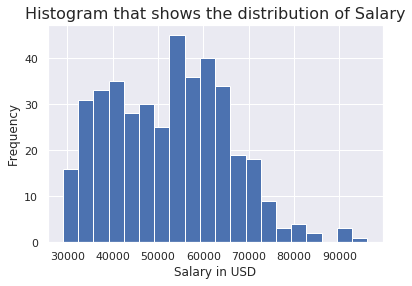

In [5]:
sns.set()
plt.hist(df_train.salary, bins=20)
plt.title('Histogram that shows the distribution of Salary', fontsize=16)
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

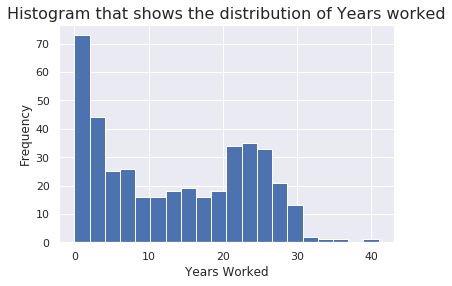

In [6]:
sns.set()
plt.hist(df_train.yearsworked, bins=20)
plt.title('Histogram that shows the distribution of Years worked', fontsize=16)
plt.xlabel('Years Worked')
plt.ylabel('Frequency')
plt.show()

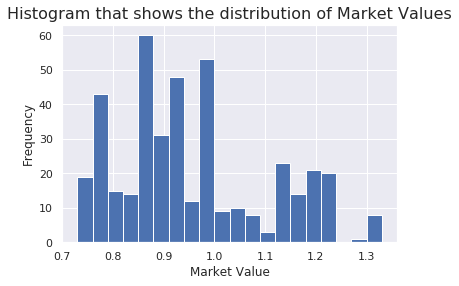

In [7]:
sns.set()
plt.hist(df_train.market, bins=20)
plt.title('Histogram that shows the distribution of Market Values', fontsize=16)
plt.xlabel('Market Value')
plt.ylabel('Frequency')
plt.show()

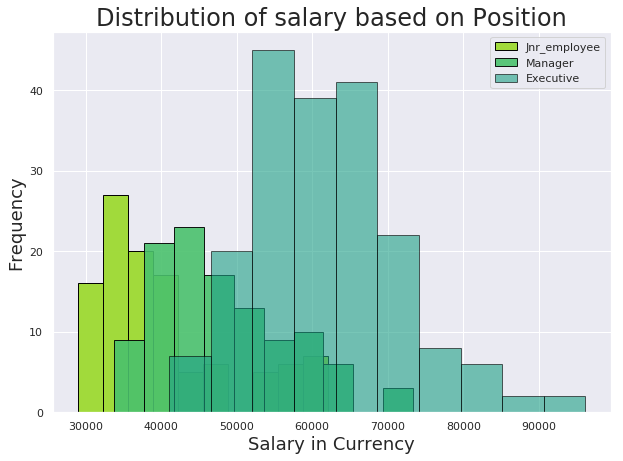

In [8]:
sns.set_palette('viridis_r')
plt.tight_layout()
df_train[df_train['position']=='Jnr_employee'].salary.plot(kind='hist',edgecolor='black',alpha=0.99,figsize=(10,7))
df_train[df_train['position']=='Manager'].salary.plot(kind='hist',edgecolor='black',alpha=0.9,figsize=(10,7))
df_train[df_train['position']=='Executive'].salary.plot(kind='hist',edgecolor='black',alpha=0.6,figsize=(10,7))
plt.legend(labels=['Jnr_employee','Manager','Executive'])
plt.title('Distribution of salary based on Position', size=24)
plt.xlabel('Salary in Currency', size=18)
plt.ylabel('Frequency', size=18);

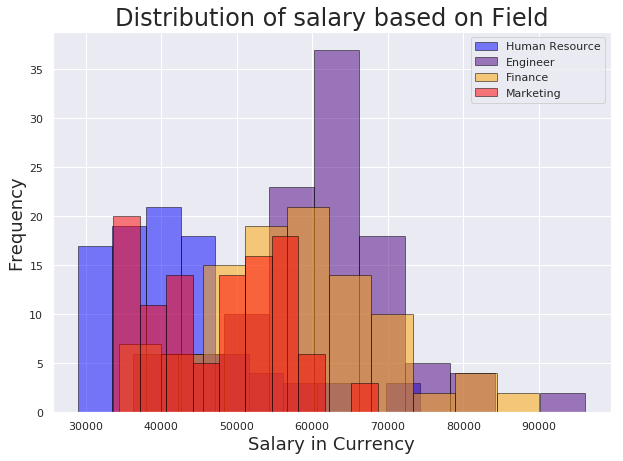

In [9]:
sns.set()
df_train[df_train['Field']=='Human Resource'].salary.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
df_train[df_train['Field']=='Engineering'].salary.plot(kind='hist',color='indigo',edgecolor='black',alpha=0.5,figsize=(10,7))
df_train[df_train['Field']=='Finance'].salary.plot(kind='hist',color='orange',edgecolor='black',alpha=0.5,figsize=(10,7))
df_train[df_train['Field']=='Marketing'].salary.plot(kind='hist',color='red',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Human Resource','Engineer','Finance','Marketing'])
plt.title('Distribution of salary based on Field', size=24)
plt.xlabel('Salary in Currency', size=18)
plt.ylabel('Frequency', size=18);

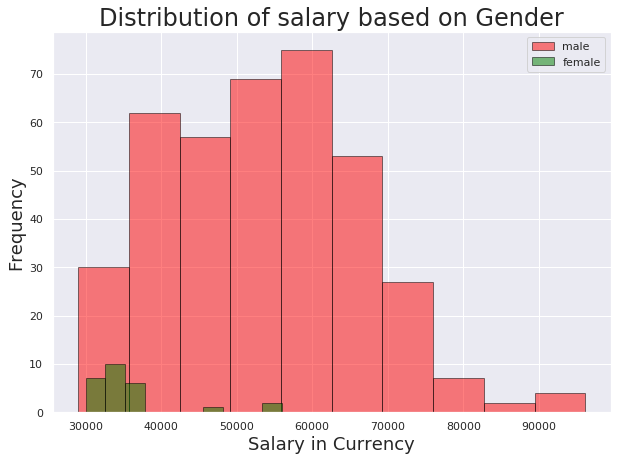

In [10]:
df_train[df_train['gender']=='male'].salary.plot(kind='hist',color='red',edgecolor='black',alpha=0.5,figsize=(10,7))
df_train[df_train['gender']=='female'].salary.plot(kind='hist',color='green',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['male','female'])
plt.title('Distribution of salary based on Gender', size=24)
plt.xlabel('Salary in Currency', size=18)
plt.ylabel('Frequency', size=18);

### 1.3 Scatter Plots to analyse the relationships

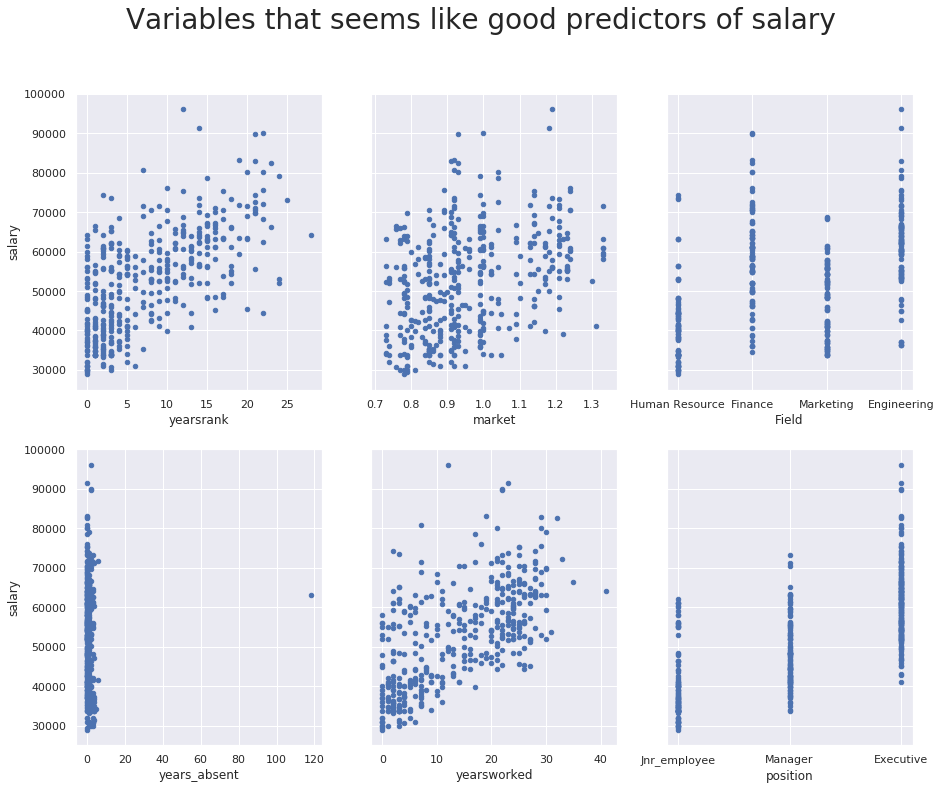

In [11]:
#Handle RGBA or RGB value warning 
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# Plot subplots of scatter plots of  Salary vs Other Possible Predicting Variables
sns.set()
fig, axs = plt.subplots(2, 3,sharey=True)
fig.suptitle('Variables that seems like good predictors of salary', fontsize=28)
df_train.plot(kind='scatter', x='yearsrank', y='salary', ax=axs[0,0],figsize=(15, 12))
df_train.plot(kind='scatter', x='market', y='salary', ax=axs[0,1])   
df_train.plot(kind='scatter', x='Field', y='salary', ax=axs[0,2])
df_train.plot(kind='scatter', x='years_absent', y='salary', ax=axs[1,0])
df_train.plot(kind='scatter', x='yearsworked', y='salary', ax=axs[1,1])
df_train.plot(kind='scatter', x='position', y='salary', ax=axs[1,2])
plt.show()

## Checking and handling outliers

In [12]:
# Quartiles and IQR:df_train
q75_train, q25_train = np.percentile(df_train['salary'], [75 ,25])
iqr_train = q75_train - q25_train

# Extremes' boundaries: df_train
lower_bound = q25_train - iqr_train*1.5
upper_bound = q75_train + iqr_train*1.5

#Determining if an entry is an extreme or an outlier:df_train
df_train['Is_it_an_extreme'] = ['Yes' if i < lower_bound else 'Yes' 
                                if i > upper_bound else "No" 
                                for i in df_train.salary]
df_outliers = df_train[df_train.Is_it_an_extreme == 'Yes']

#Dropping outliers
df_train = df_train[df_train.Is_it_an_extreme != 'Yes']

#df_train descriptive statistics
df_train.describe()

,salary,yearsworked,yearsrank,market,years_absent
count,411.000000,411.000000,411.000000,411.000000,411.000000
mean,52286.099066,13.559611,7.491484,0.959903,1.051095
std,12843.956214,9.867326,6.723225,0.150166,5.887549
min,29000.000000,0.000000,0.000000,0.730000,0.000000
25%,41089.500000,4.000000,2.000000,0.850000,0.000000
50%,53003.000000,13.000000,5.000000,0.920000,0.000000
75%,61446.000000,23.000000,13.000000,1.040000,1.000000
max,91405.000000,41.000000,28.000000,1.330000,118.000000


### 2. Dummy variables for Field variable with Human Resource as reference

In [47]:
df_dummies =pd.get_dummies(df_train.Field).loc[:,['Engineering','Finance','Marketing']]
df_dummies

,Engineering,Finance,Marketing
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,1
4,0,0,1
...,...,...,...
407,0,0,0
408,0,0,1
409,0,0,0
410,0,0,0


### 3. correlation matrix comparing the relationship of salary to the predictor variables

In [14]:
df_train.corr(method='pearson')
# df_train.corr(method='spearman')
# df_train.corr(method='kendall')

,salary,yearsworked,yearsrank,market,years_absent
salary,1.000000,0.644423,0.647748,0.364637,0.007308
yearsworked,0.644423,1.000000,0.821888,-0.089410,0.034899
yearsrank,0.647748,0.821888,1.000000,-0.044235,0.071949
market,0.364637,-0.089410,-0.044235,1.000000,-0.080908
years_absent,0.007308,0.034899,0.071949,-0.080908,1.000000


### Is there any multicollinearity or other problems that may be a problem in the multiple regression
 <p> Looking at the above correlation coefficients. There's is a moderarate positive relationship between salary and years worked and there's is a moderarate positive relationship between salary and years. This shows multicollinearity. Given, a function that assess salary as a function:</p>

   **Y’ = B0 + B1X1 + B2X2 + ei for i = 1,2, ... n.**  where:

*  **Y'** : Is the predicted dependent variable salary
*  **B0** : Is the intercept of the regression line
* **X1**: Predicting independent variable: Years worked
* **B1**: Is the marginal effect on salary of one additional year worked, holding other variables constant.
* **X2**: Predicting independent variable: Years rank
* **B2**: Is the marginal effect on salary of one additional year ranked, holding other variables constant.
* **ei** : Is the standard deviations of the model

What the regression model is going to do is to disentangle the individual effects of years worked and years rank on salary. Given the opportunity that the regression model does tease apart these individual effects, such individual effects become obscured. Multicolinearity happens when the X variables are themselves related.

This is a perfect description for multicolinearity, if **one year a experience is added**, the likelihood that one stays in that **rank for one more year** is close to 100%, similarly with **market value**, it is common knowledge that yeats of experience do actually increase the market value of an individual, so the regression model will have a very unrealistic way of analysing if the effect on salary was due to an increase in market value or due to one more year of experience or one more year of being in that particular rank.


### 4. Model creation of salary prediction based on multivariables

In [15]:
import statsmodels.formula.api as smf
# create a fitted model: salary vs Years worked _ Market + Years Rank
model= smf.ols(formula='salary ~ yearsworked + market + yearsrank', data=df_train).fit()
model.params

Intercept       6161.917625
yearsworked      537.987238
market         35583.941549
yearsrank        623.663206
dtype: float64

In [16]:
print(model.summary())
print(color.BOLD + "This model has a higher R-squared (0.63) than the previous model's(0.415), This model provides a better fit to the data than a model that only one variable years worked")

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     230.5
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           2.26e-87
Time:                        12:38:45   Log-Likelihood:                -4267.0
No. Observations:                 411   AIC:                             8542.
Df Residuals:                     407   BIC:                             8558.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6161.9176   2622.780      2.349      

### 4.1  Important features predicting salary

In [17]:
#Coefficients for every variable
coeffs0 = scipy.pearsonr(df_train.salary,df_train.yearsworked)
coeffs1 = scipy.pearsonr(df_train.salary,df_train.market)
coeffs2 = scipy.pearsonr(df_train.salary,df_train.yearsrank)

#Salary vs Years worked interpretation
print(color.BOLD + color.UNDERLINE +'Salary predicted by Years worked: ' + color.END)
g = pd.Series({'Corr Coeff':coeffs0[0],'p-value':coeffs0[1],})
print(g.to_string())
print(color.BOLD + 'Therefore: Positive correlation between salary and years worked, reject null(p-value<0,05), there is a relationship.\n')

#Salary vs Market Value interpretation
print(color.BOLD + color.UNDERLINE +'Salary predicted by Market Value: ' + color.END)
g = pd.Series({'Corr Coeff':coeffs1[0],'p-value':coeffs1[1],})
print(g.to_string())
print(color.BOLD +'Therefore: Positive correlation between salary and Market Value, reject null(p-value<0,05), there is a relationship\n.' + color.END)

#Salary vs Years Rank interpretation
print(color.BOLD + color.UNDERLINE +'Salary predicted by Years Rank: ' + color.END)
g = pd.Series({'Corr Coeff':coeffs2[0],'p-value':coeffs2[1],})
print(g.to_string())
print(color.BOLD +'Therefore: Positive correlation between salary and Years Rank, reject null(p-value<0,05), there is a relationship\n.' + color.END)

Salary predicted by Years worked: 
Corr Coeff    6.444226e-01
p-value       1.336464e-49
Therefore: Positive correlation between salary and years worked, reject null(p-value<0,05), there is a relationship.

Salary predicted by Market Value: 
Corr Coeff    3.646367e-01
p-value       2.271567e-14
Therefore: Positive correlation between salary and Market Value, reject null(p-value<0,05), there is a relationship
.
Salary predicted by Years Rank: 
Corr Coeff    6.477483e-01
p-value       2.941669e-50
Therefore: Positive correlation between salary and Years Rank, reject null(p-value<0,05), there is a relationship
.


## 5. Prediction of salary and calculating residuals

In [18]:
#model1: predict salary using years worked
df_train1 = model.predict(df_train)
df_train1 = pd.DataFrame(df_train1)

#Mapping 2 columns: Observed salary together with Predicted salary
df_train1['Actual Salary'] = df_train['salary']
df_train1= df_train1.rename(columns={0:'Predicted Salary'})
df_train1['Actual Salary'] = df_train1['Actual Salary'].astype(float)
df_train1['Predicted Salary'] = df_train1['Predicted Salary'].astype(float)

#Creating a residual column( a residual vertical distance between a data point and the regression line)
df_train1['Residual'] = (df_train1['Actual Salary'] - df_train1['Predicted Salary'])

#calculating the RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
y_actual1 = df_train1['Actual Salary']
y_predicted1 = df_train1['Predicted Salary']
rmse_train = sqrt(mean_squared_error(y_actual1,y_predicted1))


#standardizing residuals
#Standardized residual = (observed count – expected count) / √expected count
df_train1['Standardised Residuals'] = df_train1.Residual/rmse_train


### 5.1 Residuals

In [41]:
df_train1.head()

,Predicted Salary,Actual Salary,Residual,Standardised Residuals
0,47795.127707,53000.0,5204.872293,0.666578
1,50286.005501,58000.0,7713.994499,0.987916
2,49218.488251,45500.0,-3718.488251,-0.476219
3,43089.657797,35782.0,-7307.657797,-0.935877
4,40866.606249,34731.0,-6135.606249,-0.785775


### 6. Residual vs Predicted Residual plot

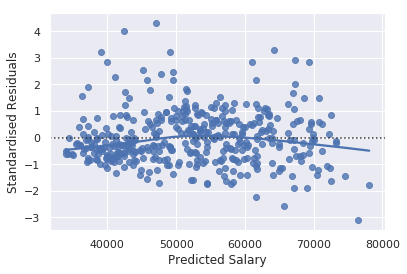

In [20]:
sns.residplot(df_train1['Predicted Salary'],df_train1['Standardised Residuals'], lowess= True)

### 7. Running the model on the test set

In [21]:
# Quartiles and IQR:df_test
q75_test, q25_test = np.percentile(df_test['salary'], [75 ,25])
iqr_test = q75_test - q25_test

# Extremes' boundaries: df_test
test_lower_bound = q25_test - iqr_test*1.5
test_upper_bound = q75_test + iqr_test*1.5

#Determining if an entry is an extreme or an outlier:df_test
df_test['Is_it_an_extreme'] = ['Yes' if i < test_lower_bound else 'Yes'
                               if i > test_upper_bound else "No"
                               for i in df_test.salary]
df_test_outliers = df_test[df_test.Is_it_an_extreme == 'Yes']

#Dropping outliers
df_test = df_test[df_test.Is_it_an_extreme != 'Yes']

#Dropping outliers
df_test = df_test[df_test.Is_it_an_extreme != 'Yes']
df_test.describe()

,salary,yearsworked,yearsrank,market,years_absent
count,101.000000,101.000000,101.000000,101.000000,101.000000
mean,44438.594833,9.940594,5.168317,0.897228,30.801980
std,8570.404234,6.900466,4.571803,0.132523,24.224376
min,30001.000000,0.000000,0.000000,0.710000,0.000000
25%,37615.000000,4.000000,2.000000,0.810000,3.000000
50%,42603.000000,8.000000,4.000000,0.850000,30.000000
75%,50008.000000,15.000000,7.000000,0.930000,49.000000
max,64770.000000,28.000000,20.000000,1.240000,112.000000


In [22]:
model1= smf.ols(formula='salary ~ yearsworked + market + yearsrank', data=df_test).fit()
model1.params

Intercept       7176.861813
yearsworked      786.309947
market         34743.237779
yearsrank       -334.199969
dtype: float64

In [40]:
#model1: predict salary using years worked
df_test1 = model1.predict(df_test)
df_test1 = pd.DataFrame(df_test1)

#Mapping 2 columns: Observed salary together with Predicted salary
df_test1['Actual Salary'] = df_test['salary']
df_test1= df_test1.rename(columns={0:'Predicted Salary'})
df_test1['Actual Salary'] = df_test1['Actual Salary'].astype(float)
df_test1['Predicted Salary'] = df_test1['Predicted Salary'].astype(float)

#Creating a residual column( a residual vertical distance between a data point and the regression line)
df_test1['Residual'] = (df_test1['Actual Salary'] - df_test1['Predicted Salary'])

#calculating the RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
y_actual = df_test1['Actual Salary']
y_predicted = df_test1['Predicted Salary']

rmse_test = sqrt(mean_squared_error(y_actual,y_predicted))

#standardizing residuals
#Standardized residual = (observed count – expected count) / √expected count
df_test1['Standardised Residuals'] = df_test1.Residual/rmse_test
df_test1.head()

,Predicted Salary,Actual Salary,Residual,Standardised Residuals
412,38517.054669,35574.0,-2943.054669,-0.474000
413,50258.477007,59000.0,8741.522993,1.407884
414,50572.510778,47344.0,-3228.510778,-0.519975
415,36982.950228,35000.0,-1982.950228,-0.319368
416,37717.510576,40000.0,2282.489424,0.367611


### 7.1 RMSE Differences 

In [43]:
print('The RMSE of the train data is: ',rmse_train)
print('And The RMSE of the test data is: ',rmse_test,'which shows slight level of underfitting')

The RMSE of the train data is:  7808.349613645194
And The RMSE of the test data is:  6208.978569970106 which shows little to no signs of underfitting


### Conclusion

After such evidence, it is safe to conclude that this is a good model to predict salary.